## *Face Identification Process using opencv*

In [1]:
!pip uninstall opencv-contrib-python

Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python-4.10.0.84.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Core-e6d3f451.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Gui-5dea4132.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Test-d435aae7.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Widgets-e392eaf8.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5XcbQpa-3bf8a55a.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libX11-xcb-0e257303.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10

In [2]:

!pip install opencv-contrib-python  --upgrade
!pip install streamlit
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [3]:
#import the libraries below
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import the necessary function from google.colab.patches
from google.colab.patches import cv2_imshow

Saving train_image_4.jpg to train_image_4.jpg
User uploaded file "train_image_4.jpg" with length 123294 bytes


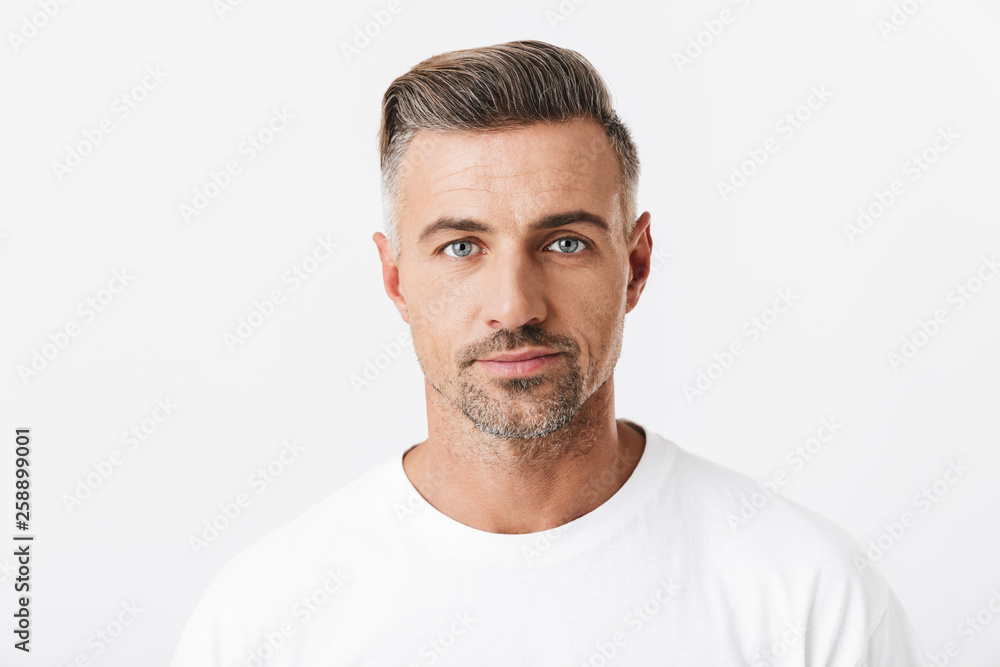

In [4]:
# prompt: upload image file

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  img = cv2.imdecode(np.frombuffer(uploaded[fn], np.uint8), 1)
  cv2_imshow(img)



In [5]:
# Download the haarcascade XML file from opencv's github
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -O haarcascade_frontalface_default.xml

--2024-12-04 11:36:34--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2024-12-04 11:36:34 (22.7 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



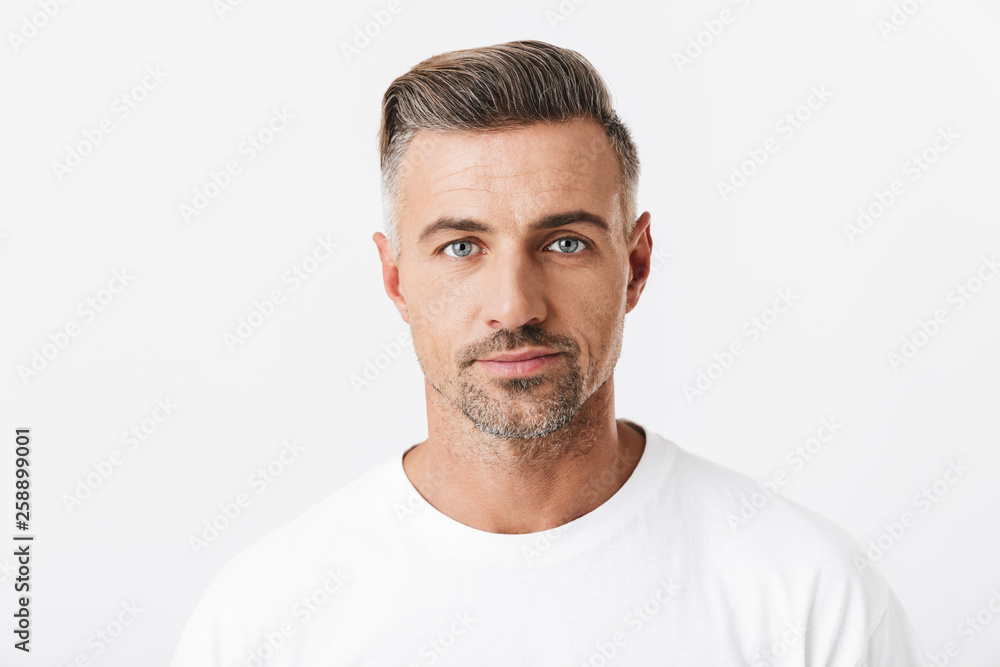

In [7]:
#you can load image using imread and to show the image, use imshow to open a window
img = cv2.imread(fn)
cv2_imshow(img)


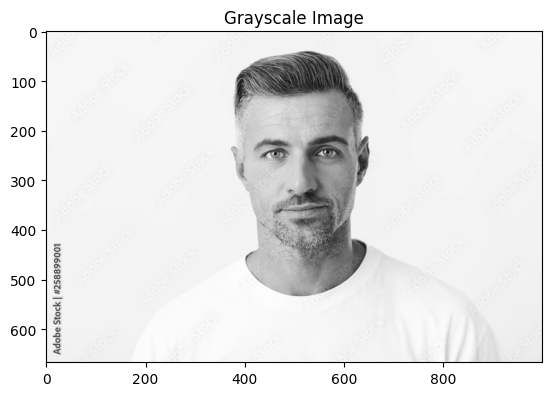

In [8]:
#use grey image for identifying the face
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.show()

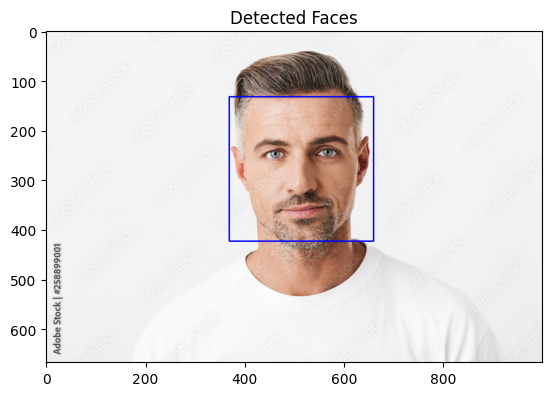

In [9]:
#create a model using harcascade. without this file, face could not be identified
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Verify if the cascade classifier is loaded correctly
if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier xml file')

#now detect the face(s). Keep scale factor between 0.8-1.4 max
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

#here we will draw rectangle over face. the x, y are the left upper corner, x+w and y+h are the right bottom corner of the rectangle
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

#now show the image with colour but using the indentified face coordinates to draw a square
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Detected Faces')
plt.show()

In [14]:
#from here we will train multiple images given in the folder
training_images = []  #create a list to hold training images
training_labels = []  #create a list to hold labels for each image

#now load all the images below using for loop. I have 5 images labelled from 1-5 so the range is 1-6
for i in range(1, 6):
    img = cv2.imread(f'train_image_{i}.jpg', cv2.IMREAD_GRAYSCALE)
    training_images.append(img)
    training_labels.append(i)  #once loaded the image, append the label name for the image in training label. when image will be identified, it will provide the same
    #image index for training labels also.

In [15]:
#check for the 1st array training image shape
training_images[0].shape

(667, 1000)

In [16]:
#check whether labels are properly appended.
training_labels

[1, 2, 3, 4, 5]

In [17]:
# Import the face module explicitly
face_recognizer = cv2.face

#now create LBPH recognizer to recognize the images and train using the recognizer
recognizer = face_recognizer.LBPHFaceRecognizer_create()

# Train recognizer
recognizer.train(training_images, np.array(training_labels))

In [18]:
test_img = cv2.imread('test_face.jpg', cv2.IMREAD_GRAYSCALE)

#finally, predict the label of the test image. test image is obne of the image from the training images
label, confidence = recognizer.predict(test_img)
print(f'Label: {label}, Confidence: {confidence}')

Label: 3, Confidence: 0.0


## Accessing Camera


In [ ]:
#use videocapture to access the default camera using '0'. 0 means default camera
cap = cv2.VideoCapture(0)

while True:
    #here we will capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    #now take a look at the face in the opened window to display the live video stream. if you press 'c', it will capture your image and 'q' for quite which do not take photo
    cv2.imshow('Camera', frame)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('c'):
        #and then save the captured image
        cv2.imwrite('captured_face.jpg', frame)
        print("Photo captured and saved as 'captured_face.jpg'")
        break
    elif key == ord('q'):
        break

#close windows and camera using release and destrpy
cap.release()
cv2.destroyAllWindows()

In [12]:
#just rename the captured image to a labeled format such that it do not have any random name. use below name to identify seperately from the known images
import os
os.rename('train_image_6.jpg', 'person_1.jpg')
print("Photo renamed to 'person_1.jpge'")

Photo renamed to 'person_1.jpge'


In [19]:
#from here, same steps as performd earlier.
new_img = cv2.imread('person_1.jpg', cv2.IMREAD_GRAYSCALE)

#append to training data used earlier but using new label. because this image will need new label, not any label used earlier. here we are labeling it 7
training_images.append(new_img)
training_labels.append(7)  # Assign the same label as before

#now again train the recognizer with the updated data
recognizer.train(training_images, np.array(training_labels))
print("Model retrained with the newly captured image")

Model retrained with the newly captured image


In [20]:
#now access the default camera again
cap = cv2.VideoCapture(0)

while True:
    #capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    #amd convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #now predict using the trained model (recognizer, used above to train)
    label, confidence = recognizer.predict(gray_frame)

    #display proper label and confidence on the frame
    cv2.putText(frame, f'Label: {label}, Confidence: {confidence}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    #now show the live camera feed until you press 'q'
    cv2.imshow('Face Recognition', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()